<a href="https://colab.research.google.com/github/2003MADHAV/Deeplearning_project_beased_experiments-/blob/main/010Adding_dropout_to_prevent_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Adding dropout to prevent overfitting
Another popular method for regularization is dropout.

A dropout forces a neural network to learn multiple independent representations by randomly removing connections between neurons in the learning phase.

For example, when using a dropout of 0.5, the network has to see each example twice before the connection is learned.

Therefore, a network with dropout can be seen as an ensemble of networks.

Using the below code we will improve a model that clearly overfits the training data by adding dropouts.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout

import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Dataset can be downloaded at https://archive.ics.uci.edu/ml/machine-learning-databases/00275/

In [ ]:
data = pd.read_csv('C:\\Users\\ifsrk\\Documents\\01 Deep Learning\\001 Handson\\hour.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
# Feature engineering
ohe_features = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for feature in ohe_features:
    dummies = pd.get_dummies(data[feature], prefix=feature, drop_first=False)
    data = pd.concat([data, dummies], axis=1)

data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,0,0,0,0,1,0,0,0,0,0
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,0,0,0,0,1,0,0,0,0,0
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,1,0,0,0,1,0,0,0,0,0
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
drop_features = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr', 'casual', 'registered']
data = data.drop(drop_features, axis=1)
data

,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0000,16,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0000,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0000,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0000,13,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,0.26,0.60,0.1642,119,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17375,1,0,0.26,0.60,0.1642,89,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17376,1,0,0.26,0.60,0.1642,90,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
17377,1,0,0.26,0.56,0.1343,61,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
norm_features = ['cnt', 'temp', 'hum', 'windspeed']
scaled_features = {}
for feature in norm_features:
    mean, std = data[feature].mean(), data[feature].std()
    scaled_features[feature] = [mean, std]
    data.loc[:, feature] = (data[feature] - mean)/std

scaled_features

{'cnt': [189.46308763450142, 181.38759909186527],
 'temp': [0.4969871684216586, 0.19255612124972407],
 'hum': [0.6272288394038822, 0.1929298340629125],
 'windspeed': [0.1900976063064631, 0.12234022857279413]}

In [ ]:
# Save the final month for testing
test_data = data[-31*24:]
data = data[:-31*24]

# Extract the target field
target_fields = ['cnt']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

# Create a validation set (based on the last )
X_train, y_train = features[:-30*24], targets[:-30*24]
X_val, y_val = features[-30*24:], targets[-30*24:]

In [ ]:
model = Sequential()
model.add(Dense(250, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               14250     
                                                                 
 dense_1 (Dense)             (None, 150)               37650     
                                                                 
 dense_2 (Dense)             (None, 50)                7550      
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 60,751
Trainable params: 60,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!pip install pydot

In [ ]:
# Visualize network architecture

import pydot
import pydotplus
import graphviz
from IPython.display import SVG
#from tensorflow.keras.utils.vis_utils import model_to_dot
#from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model

SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

# Save the visualization as a file
plot_model(model, show_shapes=True, to_file="dropout_network_model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


AttributeError: 'NoneType' object has no attribute 'create'

In [ ]:
n_epochs = 1000
batch_size = 1024

history = model.fit(X_train.values, y_train['cnt'],
    validation_data=(X_val.values, y_val['cnt']),
    batch_size=batch_size, epochs=n_epochs, verbose=1
    )

Epoch 1/1000
16/16 [==============================] - 2s 34ms/step - loss: 0.9941 - mse: 0.9941 - val_loss: 0.9825 - val_mse: 0.9825
Epoch 2/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.9726 - mse: 0.9726 - val_loss: 0.9735 - val_mse: 0.9735
Epoch 3/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.9476 - mse: 0.9476 - val_loss: 0.9609 - val_mse: 0.9609
Epoch 4/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.9185 - mse: 0.9185 - val_loss: 0.9473 - val_mse: 0.9473
Epoch 5/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.8847 - mse: 0.8847 - val_loss: 0.9316 - val_mse: 0.9316
Epoch 6/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.8457 - mse: 0.8457 - val_loss: 0.9169 - val_mse: 0.9169
Epoch 7/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.8027 - mse: 0.8027 - val_loss: 0.9031 - val_mse: 0.9031
Epoch 8/1000
16/16 [==============================] - 0s 15ms/step - 

16/16 [==============================] - 0s 13ms/step - loss: 0.1796 - mse: 0.1796 - val_loss: 0.2922 - val_mse: 0.2922
Epoch 63/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.1782 - mse: 0.1782 - val_loss: 0.2880 - val_mse: 0.2880
Epoch 64/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.1764 - mse: 0.1764 - val_loss: 0.2845 - val_mse: 0.2845
Epoch 65/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.1744 - mse: 0.1744 - val_loss: 0.2859 - val_mse: 0.2859
Epoch 66/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.1729 - mse: 0.1729 - val_loss: 0.2831 - val_mse: 0.2831
Epoch 67/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.1712 - mse: 0.1712 - val_loss: 0.2815 - val_mse: 0.2815
Epoch 68/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.1696 - mse: 0.1696 - val_loss: 0.2774 - val_mse: 0.2774
Epoch 69/1000
16/16 [==============================] - 0s 12ms/step - loss: 

16/16 [==============================] - 0s 13ms/step - loss: 0.0922 - mse: 0.0922 - val_loss: 0.1962 - val_mse: 0.1962
Epoch 124/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0922 - mse: 0.0922 - val_loss: 0.1886 - val_mse: 0.1886
Epoch 125/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.0905 - mse: 0.0905 - val_loss: 0.1923 - val_mse: 0.1923
Epoch 126/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0891 - mse: 0.0891 - val_loss: 0.1865 - val_mse: 0.1865
Epoch 127/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0894 - mse: 0.0894 - val_loss: 0.1949 - val_mse: 0.1949
Epoch 128/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0875 - mse: 0.0875 - val_loss: 0.1953 - val_mse: 0.1953
Epoch 129/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0868 - mse: 0.0868 - val_loss: 0.1901 - val_mse: 0.1901
Epoch 130/1000
16/16 [==============================] - 0s 12ms/step -

Epoch 184/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.1473 - val_mse: 0.1473
Epoch 185/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.1521 - val_mse: 0.1521
Epoch 186/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.1811 - val_mse: 0.1811
Epoch 187/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0612 - mse: 0.0612 - val_loss: 0.1541 - val_mse: 0.1541
Epoch 188/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0589 - mse: 0.0589 - val_loss: 0.1833 - val_mse: 0.1833
Epoch 189/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0614 - mse: 0.0614 - val_loss: 0.1614 - val_mse: 0.1614
Epoch 190/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0586 - mse: 0.0586 - val_loss: 0.1515 - val_mse: 0.1515
Epoch 191/1000
16/16 [==============================] -

Epoch 245/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.0487 - mse: 0.0487 - val_loss: 0.1401 - val_mse: 0.1401
Epoch 246/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.1388 - val_mse: 0.1388
Epoch 247/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0496 - mse: 0.0496 - val_loss: 0.1382 - val_mse: 0.1382
Epoch 248/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0489 - mse: 0.0489 - val_loss: 0.1395 - val_mse: 0.1395
Epoch 249/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0519 - mse: 0.0519 - val_loss: 0.1378 - val_mse: 0.1378
Epoch 250/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0489 - mse: 0.0489 - val_loss: 0.1433 - val_mse: 0.1433
Epoch 251/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.1480 - val_mse: 0.1480
Epoch 252/1000
16/16 [==============================] -

Epoch 306/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0446 - mse: 0.0446 - val_loss: 0.1392 - val_mse: 0.1392
Epoch 307/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.1478 - val_mse: 0.1478
Epoch 308/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0423 - mse: 0.0423 - val_loss: 0.1385 - val_mse: 0.1385
Epoch 309/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 0.1387 - val_mse: 0.1387
Epoch 310/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.0464 - mse: 0.0464 - val_loss: 0.1370 - val_mse: 0.1370
Epoch 311/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0512 - mse: 0.0512 - val_loss: 0.1376 - val_mse: 0.1376
Epoch 312/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0485 - mse: 0.0485 - val_loss: 0.1385 - val_mse: 0.1385
Epoch 313/1000
16/16 [==============================] -

Epoch 367/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0405 - mse: 0.0405 - val_loss: 0.1422 - val_mse: 0.1422
Epoch 368/1000
16/16 [==============================] - 0s 16ms/step - loss: 0.0392 - mse: 0.0392 - val_loss: 0.1374 - val_mse: 0.1374
Epoch 369/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.1364 - val_mse: 0.1364
Epoch 370/1000
16/16 [==============================] - 0s 17ms/step - loss: 0.0396 - mse: 0.0396 - val_loss: 0.1387 - val_mse: 0.1387
Epoch 371/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0402 - mse: 0.0402 - val_loss: 0.1394 - val_mse: 0.1394
Epoch 372/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.1437 - val_mse: 0.1437
Epoch 373/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.0385 - mse: 0.0385 - val_loss: 0.1471 - val_mse: 0.1471
Epoch 374/1000
16/16 [==============================] -

Epoch 428/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.1460 - val_mse: 0.1460
Epoch 429/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.1517 - val_mse: 0.1517
Epoch 430/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.1425 - val_mse: 0.1425
Epoch 431/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.1438 - val_mse: 0.1438
Epoch 432/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.1469 - val_mse: 0.1469
Epoch 433/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0388 - mse: 0.0388 - val_loss: 0.1419 - val_mse: 0.1419
Epoch 434/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.1597 - val_mse: 0.1597
Epoch 435/1000
16/16 [==============================] -

Epoch 489/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0407 - mse: 0.0407 - val_loss: 0.1503 - val_mse: 0.1503
Epoch 490/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.1436 - val_mse: 0.1436
Epoch 491/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.1492 - val_mse: 0.1492
Epoch 492/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.1390 - val_mse: 0.1390
Epoch 493/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0363 - mse: 0.0363 - val_loss: 0.1447 - val_mse: 0.1447
Epoch 494/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0.1455 - val_mse: 0.1455
Epoch 495/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.1496 - val_mse: 0.1496
Epoch 496/1000
16/16 [==============================] -

Epoch 550/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0342 - mse: 0.0342 - val_loss: 0.1722 - val_mse: 0.1722
Epoch 551/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0372 - mse: 0.0372 - val_loss: 0.1506 - val_mse: 0.1506
Epoch 552/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0326 - mse: 0.0326 - val_loss: 0.1485 - val_mse: 0.1485
Epoch 553/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.1411 - val_mse: 0.1411
Epoch 554/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0411 - mse: 0.0411 - val_loss: 0.1415 - val_mse: 0.1415
Epoch 555/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.1405 - val_mse: 0.1405
Epoch 556/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.1418 - val_mse: 0.1418
Epoch 557/1000
16/16 [==============================] -

Epoch 611/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0326 - mse: 0.0326 - val_loss: 0.1431 - val_mse: 0.1431
Epoch 612/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.1438 - val_mse: 0.1438
Epoch 613/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.1423 - val_mse: 0.1423
Epoch 614/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0319 - mse: 0.0319 - val_loss: 0.1465 - val_mse: 0.1465
Epoch 615/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.1531 - val_mse: 0.1531
Epoch 616/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0305 - mse: 0.0305 - val_loss: 0.1485 - val_mse: 0.1485
Epoch 617/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.1566 - val_mse: 0.1566
Epoch 618/1000
16/16 [==============================] -

Epoch 672/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.1478 - val_mse: 0.1478
Epoch 673/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0301 - mse: 0.0301 - val_loss: 0.1493 - val_mse: 0.1493
Epoch 674/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.1615 - val_mse: 0.1615
Epoch 675/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0301 - mse: 0.0301 - val_loss: 0.1551 - val_mse: 0.1551
Epoch 676/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.1498 - val_mse: 0.1498
Epoch 677/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.1555 - val_mse: 0.1555
Epoch 678/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.1580 - val_mse: 0.1580
Epoch 679/1000
16/16 [==============================] -

Epoch 733/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.1526 - val_mse: 0.1526
Epoch 734/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.1567 - val_mse: 0.1567
Epoch 735/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.1501 - val_mse: 0.1501
Epoch 736/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0283 - mse: 0.0283 - val_loss: 0.1555 - val_mse: 0.1555
Epoch 737/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.1500 - val_mse: 0.1500
Epoch 738/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.1508 - val_mse: 0.1508
Epoch 739/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.1530 - val_mse: 0.1530
Epoch 740/1000
16/16 [==============================] -

Epoch 794/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0290 - mse: 0.0290 - val_loss: 0.1518 - val_mse: 0.1518
Epoch 795/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.1505 - val_mse: 0.1505
Epoch 796/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.1641 - val_mse: 0.1641
Epoch 797/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0295 - mse: 0.0295 - val_loss: 0.1662 - val_mse: 0.1662
Epoch 798/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.1678 - val_mse: 0.1678
Epoch 799/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.1604 - val_mse: 0.1604
Epoch 800/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0272 - mse: 0.0272 - val_loss: 0.1603 - val_mse: 0.1603
Epoch 801/1000
16/16 [==============================] -

Epoch 855/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.1742 - val_mse: 0.1742
Epoch 856/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.1601 - val_mse: 0.1601
Epoch 857/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.1571 - val_mse: 0.1571
Epoch 858/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.1656 - val_mse: 0.1656
Epoch 859/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0262 - mse: 0.0262 - val_loss: 0.1624 - val_mse: 0.1624
Epoch 860/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.1709 - val_mse: 0.1709
Epoch 861/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.1562 - val_mse: 0.1562
Epoch 862/1000
16/16 [==============================] -

Epoch 916/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0263 - mse: 0.0263 - val_loss: 0.1601 - val_mse: 0.1601
Epoch 917/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.1614 - val_mse: 0.1614
Epoch 918/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.1907 - val_mse: 0.1907
Epoch 919/1000
16/16 [==============================] - 0s 17ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.1681 - val_mse: 0.1681
Epoch 920/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.1654 - val_mse: 0.1654
Epoch 921/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.0259 - mse: 0.0259 - val_loss: 0.1632 - val_mse: 0.1632
Epoch 922/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.0258 - mse: 0.0258 - val_loss: 0.1632 - val_mse: 0.1632
Epoch 923/1000
16/16 [==============================] -

Epoch 977/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.1529 - val_mse: 0.1529
Epoch 978/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.1607 - val_mse: 0.1607
Epoch 979/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.1561 - val_mse: 0.1561
Epoch 980/1000
16/16 [==============================] - 0s 12ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.1602 - val_mse: 0.1602
Epoch 981/1000
16/16 [==============================] - 0s 14ms/step - loss: 0.0260 - mse: 0.0260 - val_loss: 0.1627 - val_mse: 0.1627
Epoch 982/1000
16/16 [==============================] - 0s 15ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.1718 - val_mse: 0.1718
Epoch 983/1000
16/16 [==============================] - 0s 13ms/step - loss: 0.0292 - mse: 0.0292 - val_loss: 0.1663 - val_mse: 0.1663
Epoch 984/1000
16/16 [==============================] -

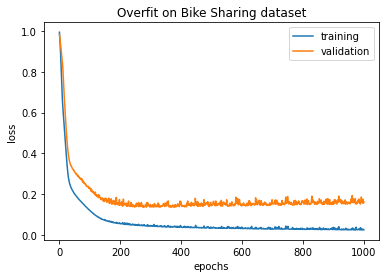

In [ ]:
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='training')
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='validation')
plt.title('Overfit on Bike Sharing dataset')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc=0)
plt.show()

In [ ]:
print('Minimum loss: ', min(history.history['val_loss']),
 '\nAfter ', np.argmin(history.history['val_loss']), ' epochs')

# Minimum loss:  0.129907280207
# After  980  epochs

Minimum loss:  0.1364191323518753 
After  368  epochs


Dropout is a technique where randomly selected neurons are ignored during training.
They are “dropped out” randomly.
This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.

As a neural network learns, neuron weights settle into their context within the network.
Weights of neurons are tuned for specific features, providing some specialization. Neighboring neurons come to rely on this specialization, which, if taken too far, can result in a fragile model too specialized for the training data.
This reliance on context for a neuron during training is referred to as complex co-adaptations.

You can imagine that if neurons are randomly dropped out of the network during training, other neurons will have to step in and handle the representation required to make predictions for the missing neurons.
This is believed to result in multiple independent internal representations being learned by the network.

The effect is that the network becomes less sensitive to the specific weights of neurons.
This, in turn, results in a network capable of better generalization and less likely to overfit the training data.

In [ ]:
model_drop = Sequential()
model_drop.add(Dense(250, input_dim=X_train.shape[1], activation='relu'))
model_drop.add(Dropout(0.20))
model_drop.add(Dense(150, activation='relu'))
model_drop.add(Dropout(0.20))
model_drop.add(Dense(50, activation='relu'))
model_drop.add(Dropout(0.20))
model_drop.add(Dense(25, activation='relu'))
model_drop.add(Dropout(0.20))
model_drop.add(Dense(1, activation='linear'))

# Compile model
model_drop.compile(loss='mse', optimizer='sgd', metrics=['mse'])

In [ ]:
model_drop.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 250)               14250     
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_6 (Dense)             (None, 150)               37650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                7550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 25)               

In [ ]:
history_drop = model_drop.fit(X_train.values, y_train['cnt'],
    validation_data=(X_val.values, y_val['cnt']),
    batch_size=batch_size, epochs=n_epochs, verbose=1
    )

Epoch 1/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.6914 - mse: 0.6914 - val_loss: 0.7712 - val_mse: 0.7712
Epoch 2/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.6980 - mse: 0.6980 - val_loss: 0.7510 - val_mse: 0.7510
Epoch 3/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.6844 - mse: 0.6844 - val_loss: 0.7399 - val_mse: 0.7399
Epoch 4/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.6636 - mse: 0.6636 - val_loss: 0.7234 - val_mse: 0.7234
Epoch 5/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.6600 - mse: 0.6600 - val_loss: 0.7005 - val_mse: 0.7005
Epoch 6/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.6573 - mse: 0.6573 - val_loss: 0.6902 - val_mse: 0.6902
Epoch 7/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.6365 - mse: 0.6365 - val_loss: 0.6698 - val_mse: 0.6698
Epoch 8/1000
16/16 [==============================] - 0s 23ms/step - 

16/16 [==============================] - 0s 23ms/step - loss: 0.3398 - mse: 0.3398 - val_loss: 0.3398 - val_mse: 0.3398
Epoch 63/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.3418 - mse: 0.3418 - val_loss: 0.3392 - val_mse: 0.3392
Epoch 64/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.3381 - mse: 0.3381 - val_loss: 0.3375 - val_mse: 0.3375
Epoch 65/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.3344 - mse: 0.3344 - val_loss: 0.3356 - val_mse: 0.3356
Epoch 66/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.3342 - mse: 0.3342 - val_loss: 0.3340 - val_mse: 0.3340
Epoch 67/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.3345 - mse: 0.3345 - val_loss: 0.3326 - val_mse: 0.3326
Epoch 68/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.3264 - mse: 0.3264 - val_loss: 0.3309 - val_mse: 0.3309
Epoch 69/1000
16/16 [==============================] - 0s 24ms/step - loss: 

16/16 [==============================] - 0s 22ms/step - loss: 0.2575 - mse: 0.2575 - val_loss: 0.2728 - val_mse: 0.2728
Epoch 124/1000
16/16 [==============================] - 0s 21ms/step - loss: 0.2520 - mse: 0.2520 - val_loss: 0.2715 - val_mse: 0.2715
Epoch 125/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.2469 - mse: 0.2469 - val_loss: 0.2702 - val_mse: 0.2702
Epoch 126/1000
16/16 [==============================] - 0s 21ms/step - loss: 0.2561 - mse: 0.2561 - val_loss: 0.2692 - val_mse: 0.2692
Epoch 127/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.2481 - mse: 0.2481 - val_loss: 0.2680 - val_mse: 0.2680
Epoch 128/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.2472 - mse: 0.2472 - val_loss: 0.2666 - val_mse: 0.2666
Epoch 129/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.2442 - mse: 0.2442 - val_loss: 0.2656 - val_mse: 0.2656
Epoch 130/1000
16/16 [==============================] - 0s 24ms/step -

Epoch 184/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.2012 - mse: 0.2012 - val_loss: 0.2244 - val_mse: 0.2244
Epoch 185/1000
16/16 [==============================] - 0s 29ms/step - loss: 0.2060 - mse: 0.2060 - val_loss: 0.2232 - val_mse: 0.2232
Epoch 186/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.2015 - mse: 0.2015 - val_loss: 0.2222 - val_mse: 0.2222
Epoch 187/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.2000 - mse: 0.2000 - val_loss: 0.2217 - val_mse: 0.2217
Epoch 188/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.2032 - mse: 0.2032 - val_loss: 0.2211 - val_mse: 0.2211
Epoch 189/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1980 - mse: 0.1980 - val_loss: 0.2207 - val_mse: 0.2207
Epoch 190/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.2036 - mse: 0.2036 - val_loss: 0.2209 - val_mse: 0.2209
Epoch 191/1000
16/16 [==============================] -

Epoch 245/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1710 - mse: 0.1710 - val_loss: 0.1925 - val_mse: 0.1925
Epoch 246/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1725 - mse: 0.1725 - val_loss: 0.1918 - val_mse: 0.1918
Epoch 247/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1751 - mse: 0.1751 - val_loss: 0.1904 - val_mse: 0.1904
Epoch 248/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1692 - mse: 0.1692 - val_loss: 0.1906 - val_mse: 0.1906
Epoch 249/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.1706 - mse: 0.1706 - val_loss: 0.1903 - val_mse: 0.1903
Epoch 250/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1729 - mse: 0.1729 - val_loss: 0.1895 - val_mse: 0.1895
Epoch 251/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1741 - mse: 0.1741 - val_loss: 0.1890 - val_mse: 0.1890
Epoch 252/1000
16/16 [==============================] -

Epoch 306/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1543 - mse: 0.1543 - val_loss: 0.1720 - val_mse: 0.1720
Epoch 307/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.1720 - val_mse: 0.1720
Epoch 308/1000
16/16 [==============================] - 0s 21ms/step - loss: 0.1538 - mse: 0.1538 - val_loss: 0.1720 - val_mse: 0.1720
Epoch 309/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1520 - mse: 0.1520 - val_loss: 0.1714 - val_mse: 0.1714
Epoch 310/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1515 - mse: 0.1515 - val_loss: 0.1710 - val_mse: 0.1710
Epoch 311/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1533 - mse: 0.1533 - val_loss: 0.1708 - val_mse: 0.1708
Epoch 312/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1548 - mse: 0.1548 - val_loss: 0.1706 - val_mse: 0.1706
Epoch 313/1000
16/16 [==============================] -

Epoch 367/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1385 - mse: 0.1385 - val_loss: 0.1618 - val_mse: 0.1618
Epoch 368/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1409 - mse: 0.1409 - val_loss: 0.1613 - val_mse: 0.1613
Epoch 369/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1412 - mse: 0.1412 - val_loss: 0.1618 - val_mse: 0.1618
Epoch 370/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1396 - mse: 0.1396 - val_loss: 0.1610 - val_mse: 0.1610
Epoch 371/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1410 - mse: 0.1410 - val_loss: 0.1616 - val_mse: 0.1616
Epoch 372/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1391 - mse: 0.1391 - val_loss: 0.1609 - val_mse: 0.1609
Epoch 373/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1388 - mse: 0.1388 - val_loss: 0.1601 - val_mse: 0.1601
Epoch 374/1000
16/16 [==============================] -

Epoch 428/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1298 - mse: 0.1298 - val_loss: 0.1560 - val_mse: 0.1560
Epoch 429/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1351 - mse: 0.1351 - val_loss: 0.1553 - val_mse: 0.1553
Epoch 430/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1294 - mse: 0.1294 - val_loss: 0.1554 - val_mse: 0.1554
Epoch 431/1000
16/16 [==============================] - 0s 27ms/step - loss: 0.1294 - mse: 0.1294 - val_loss: 0.1553 - val_mse: 0.1553
Epoch 432/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1333 - mse: 0.1333 - val_loss: 0.1552 - val_mse: 0.1552
Epoch 433/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1314 - mse: 0.1314 - val_loss: 0.1551 - val_mse: 0.1551
Epoch 434/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1333 - mse: 0.1333 - val_loss: 0.1557 - val_mse: 0.1557
Epoch 435/1000
16/16 [==============================] -

Epoch 489/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1235 - mse: 0.1235 - val_loss: 0.1522 - val_mse: 0.1522
Epoch 490/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1260 - mse: 0.1260 - val_loss: 0.1523 - val_mse: 0.1523
Epoch 491/1000
16/16 [==============================] - 0s 21ms/step - loss: 0.1268 - mse: 0.1268 - val_loss: 0.1519 - val_mse: 0.1519
Epoch 492/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1242 - mse: 0.1242 - val_loss: 0.1516 - val_mse: 0.1516
Epoch 493/1000
16/16 [==============================] - 0s 21ms/step - loss: 0.1275 - mse: 0.1275 - val_loss: 0.1517 - val_mse: 0.1517
Epoch 494/1000
16/16 [==============================] - 0s 21ms/step - loss: 0.1237 - mse: 0.1237 - val_loss: 0.1516 - val_mse: 0.1516
Epoch 495/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1230 - mse: 0.1230 - val_loss: 0.1515 - val_mse: 0.1515
Epoch 496/1000
16/16 [==============================] -

Epoch 550/1000
16/16 [==============================] - 0s 21ms/step - loss: 0.1204 - mse: 0.1204 - val_loss: 0.1479 - val_mse: 0.1479
Epoch 551/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1195 - mse: 0.1195 - val_loss: 0.1478 - val_mse: 0.1478
Epoch 552/1000
16/16 [==============================] - 0s 21ms/step - loss: 0.1203 - mse: 0.1203 - val_loss: 0.1477 - val_mse: 0.1477
Epoch 553/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1179 - mse: 0.1179 - val_loss: 0.1478 - val_mse: 0.1478
Epoch 554/1000
16/16 [==============================] - 0s 21ms/step - loss: 0.1196 - mse: 0.1196 - val_loss: 0.1476 - val_mse: 0.1476
Epoch 555/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1170 - mse: 0.1170 - val_loss: 0.1478 - val_mse: 0.1478
Epoch 556/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1180 - mse: 0.1180 - val_loss: 0.1479 - val_mse: 0.1479
Epoch 557/1000
16/16 [==============================] -

Epoch 611/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1196 - mse: 0.1196 - val_loss: 0.1461 - val_mse: 0.1461
Epoch 612/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.1141 - mse: 0.1141 - val_loss: 0.1456 - val_mse: 0.1456
Epoch 613/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1163 - mse: 0.1163 - val_loss: 0.1461 - val_mse: 0.1461
Epoch 614/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1137 - mse: 0.1137 - val_loss: 0.1458 - val_mse: 0.1458
Epoch 615/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1129 - mse: 0.1129 - val_loss: 0.1459 - val_mse: 0.1459
Epoch 616/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1094 - mse: 0.1094 - val_loss: 0.1457 - val_mse: 0.1457
Epoch 617/1000
16/16 [==============================] - 0s 21ms/step - loss: 0.1117 - mse: 0.1117 - val_loss: 0.1463 - val_mse: 0.1463
Epoch 618/1000
16/16 [==============================] -

Epoch 672/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1098 - mse: 0.1098 - val_loss: 0.1449 - val_mse: 0.1449
Epoch 673/1000
16/16 [==============================] - 0s 27ms/step - loss: 0.1116 - mse: 0.1116 - val_loss: 0.1450 - val_mse: 0.1450
Epoch 674/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1124 - mse: 0.1124 - val_loss: 0.1447 - val_mse: 0.1447
Epoch 675/1000
16/16 [==============================] - 0s 21ms/step - loss: 0.1135 - mse: 0.1135 - val_loss: 0.1446 - val_mse: 0.1446
Epoch 676/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1083 - mse: 0.1083 - val_loss: 0.1446 - val_mse: 0.1446
Epoch 677/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.1089 - mse: 0.1089 - val_loss: 0.1445 - val_mse: 0.1445
Epoch 678/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1087 - mse: 0.1087 - val_loss: 0.1449 - val_mse: 0.1449
Epoch 679/1000
16/16 [==============================] -

Epoch 733/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1063 - mse: 0.1063 - val_loss: 0.1427 - val_mse: 0.1427
Epoch 734/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1087 - mse: 0.1087 - val_loss: 0.1437 - val_mse: 0.1437
Epoch 735/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1042 - mse: 0.1042 - val_loss: 0.1434 - val_mse: 0.1434
Epoch 736/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1074 - mse: 0.1074 - val_loss: 0.1436 - val_mse: 0.1436
Epoch 737/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.1079 - mse: 0.1079 - val_loss: 0.1436 - val_mse: 0.1436
Epoch 738/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1084 - mse: 0.1084 - val_loss: 0.1431 - val_mse: 0.1431
Epoch 739/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1052 - mse: 0.1052 - val_loss: 0.1433 - val_mse: 0.1433
Epoch 740/1000
16/16 [==============================] -

Epoch 794/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1045 - mse: 0.1045 - val_loss: 0.1416 - val_mse: 0.1416
Epoch 795/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1013 - mse: 0.1013 - val_loss: 0.1414 - val_mse: 0.1414
Epoch 796/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1025 - mse: 0.1025 - val_loss: 0.1413 - val_mse: 0.1413
Epoch 797/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1071 - mse: 0.1071 - val_loss: 0.1413 - val_mse: 0.1413
Epoch 798/1000
16/16 [==============================] - 0s 27ms/step - loss: 0.1052 - mse: 0.1052 - val_loss: 0.1418 - val_mse: 0.1418
Epoch 799/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1038 - mse: 0.1038 - val_loss: 0.1412 - val_mse: 0.1412
Epoch 800/1000
16/16 [==============================] - 0s 26ms/step - loss: 0.1052 - mse: 0.1052 - val_loss: 0.1415 - val_mse: 0.1415
Epoch 801/1000
16/16 [==============================] -

Epoch 855/1000
16/16 [==============================] - 0s 21ms/step - loss: 0.1003 - mse: 0.1003 - val_loss: 0.1412 - val_mse: 0.1412
Epoch 856/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1048 - mse: 0.1048 - val_loss: 0.1408 - val_mse: 0.1408
Epoch 857/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1019 - mse: 0.1019 - val_loss: 0.1411 - val_mse: 0.1411
Epoch 858/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1006 - mse: 0.1006 - val_loss: 0.1407 - val_mse: 0.1407
Epoch 859/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1013 - mse: 0.1013 - val_loss: 0.1407 - val_mse: 0.1407
Epoch 860/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1014 - mse: 0.1014 - val_loss: 0.1404 - val_mse: 0.1404
Epoch 861/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.1017 - mse: 0.1017 - val_loss: 0.1406 - val_mse: 0.1406
Epoch 862/1000
16/16 [==============================] -

Epoch 916/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.0993 - mse: 0.0993 - val_loss: 0.1395 - val_mse: 0.1395
Epoch 917/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1048 - mse: 0.1048 - val_loss: 0.1392 - val_mse: 0.1392
Epoch 918/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1001 - mse: 0.1001 - val_loss: 0.1396 - val_mse: 0.1396
Epoch 919/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.0991 - mse: 0.0991 - val_loss: 0.1390 - val_mse: 0.1390
Epoch 920/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.0976 - mse: 0.0976 - val_loss: 0.1388 - val_mse: 0.1388
Epoch 921/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.1002 - mse: 0.1002 - val_loss: 0.1384 - val_mse: 0.1384
Epoch 922/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.1019 - mse: 0.1019 - val_loss: 0.1389 - val_mse: 0.1389
Epoch 923/1000
16/16 [==============================] -

Epoch 977/1000
16/16 [==============================] - 0s 28ms/step - loss: 0.0998 - mse: 0.0998 - val_loss: 0.1389 - val_mse: 0.1389
Epoch 978/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.0992 - mse: 0.0992 - val_loss: 0.1384 - val_mse: 0.1384
Epoch 979/1000
16/16 [==============================] - 0s 26ms/step - loss: 0.0980 - mse: 0.0980 - val_loss: 0.1389 - val_mse: 0.1389
Epoch 980/1000
16/16 [==============================] - 0s 26ms/step - loss: 0.0978 - mse: 0.0978 - val_loss: 0.1388 - val_mse: 0.1388
Epoch 981/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.0968 - mse: 0.0968 - val_loss: 0.1390 - val_mse: 0.1390
Epoch 982/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.0987 - mse: 0.0987 - val_loss: 0.1392 - val_mse: 0.1392
Epoch 983/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.0969 - mse: 0.0969 - val_loss: 0.1392 - val_mse: 0.1392
Epoch 984/1000
16/16 [==============================] -

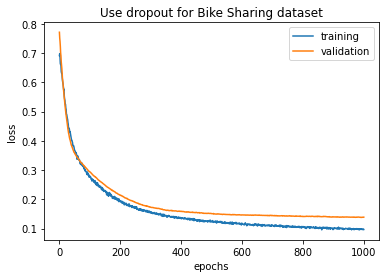

In [ ]:
plt.plot(np.arange(len(history_drop.history['loss'])), history_drop.history['loss'], label='training')
plt.plot(np.arange(len(history_drop.history['val_loss'])), history_drop.history['val_loss'], label='validation')
plt.title('Use dropout for Bike Sharing dataset')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc=0)
plt.show()

In [ ]:
print('Minimum loss: ', min(history_drop.history['val_loss']),
 '\nAfter ', np.argmin(history_drop.history['val_loss']), ' epochs')

# Minimum loss:  0.126063346863
# After  998  epochs

Minimum loss:  0.13778239488601685 
After  990  epochs
